# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

deliveries.csv
matches.csv



# Import Dataset

In [2]:
#input dataset as a pandas dataframe
matches = pd.read_csv('../input/matches.csv')

In [3]:
#display the type of object matches
type(matches)

pandas.core.frame.DataFrame

In [4]:
#describe dataset matches
matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [5]:
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [6]:
#display shape of matches
matches.shape

(756, 18)

In [7]:
#display the columns of matches
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
#display index of matches
matches.index

RangeIndex(start=0, stop=756, step=1)

> Find missing values in the target variable "winner"

# Preprocessing of Data

In [9]:
#detect missing values for winner column in matches
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


> Replace missing values in "winner" with "Draw" as a match that doesn't have a winner is declared Draw

In [10]:
#replace null values in winner with "Draw" since an undecided winner of a match clearly means it is a draw
matches['winner'].fillna('Draw', inplace=True)

> Find the number of unique teams in the entire dataset

In [11]:
#print the number of unique teams in the given dataset
print(str(matches['team1'].nunique()))

15


> Encode the team names to abbreviations for ease

In [12]:
#replace the team names wih their abbreviations as follows
#Note that Rising Pune Supergiant and Rising Pune Supergiants are the same, thus encoded the same
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors', 'Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW','DLC'],inplace=True)

#encode the abbreviated names of teams into numbers for applying models further
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DLC':14},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DLC':14},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DLC':14},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'DLC':14,'Draw':15}}


> Replace the team names with encoded abbreviations in the entire dataset

In [13]:
#replace team1, team2, toss_winner and winner columns values with values of the same in the encoded dataframe in place
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


> Find the rows corresponding to null values for "city"

In [14]:
#Find rows that have null city values
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


> Replace the null values in "city" with "Dubai"

In [15]:
#remove any null values, winner has, hence fill the null value in winner as draw
#City is also null
matches['city'].fillna('Dubai',inplace=True)
matches.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.554233,5.604497,5.462963,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.366895,3.389656,3.411850,3.361638,0.156630,3.421736,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,8.000000,8.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


> Store the "winner" in a dictionary

In [16]:
#store the winner columns of matches into a dictionary dicVal
dicVal = encode['winner']

#print the dictionary
print(dicVal)

#print(dicVal['MI']) #key value
#print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

{'MI': 1, 'KKR': 2, 'RCB': 3, 'DC': 4, 'CSK': 5, 'RR': 6, 'DD': 7, 'GL': 8, 'KXIP': 9, 'SRH': 10, 'RPS': 11, 'KTK': 12, 'PW': 13, 'DLC': 14, 'Draw': 15}


> Make a new pandas dataframe df_matches to work on and process

In [17]:
#details of matches
df_matches = pd.DataFrame(matches)
df_matches.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.554233,5.604497,5.462963,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.366895,3.389656,3.411850,3.361638,0.156630,3.421736,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,8.000000,8.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


In [18]:
df_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


> Print the number of tosses and wins by each team

In [19]:
#store toss_winner in temp1 in sorted order of their frequencies
temp1 = df_matches['toss_winner'].value_counts(sort=True)

#store winner in temp2 in sorted order of their freqencies
temp2 = df_matches['winner'].value_counts(sort=True)

print('No of toss winners by each team')

#print frequency of toss win of each team from temp1
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

print('No of match winners by each team')

#print frequency of match win of each team from temp2 
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 98
KKR -> 92
CSK -> 89
KXIP -> 81
RCB -> 81
DD -> 80
RR -> 80
SRH -> 46
DC -> 43
PW -> 20
GL -> 15
RPS -> 13
DLC -> 10
KTK -> 8
No of match winners by each team
MI -> 109
CSK -> 100
KKR -> 92
RCB -> 84
KXIP -> 82
RR -> 75
DD -> 67
SRH -> 58
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
DLC -> 10
KTK -> 6
Draw -> 4


> Find which team won the most matches using a histogram

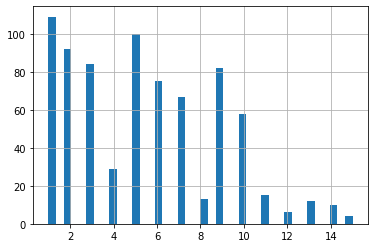

In [20]:
#shows that Mumbai won most matches followed by Chennai Super Kings
df_matches['winner'].hist(bins=40)


> Represent the winner teams and toss winner teams using bar graph

Text(0.5, 1.0, 'Match winners')

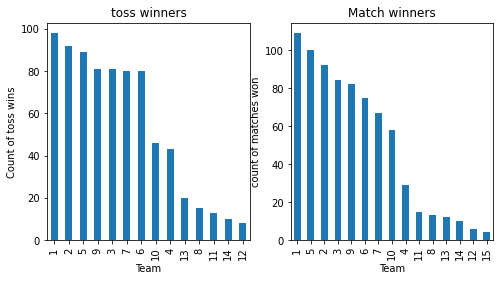

In [21]:
#bar graph for toss winners. count of toss wins Vs Team
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

#bar graph for match winners. count of matches own Vs Team
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

> Verify if any column has any more null values

In [22]:
#find the null values in every column
df_matches.apply(lambda x: sum(x.isnull()),axis=0)

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

>Find the fraction of non-null values in "umpire3" columns

In [23]:
n = (df_matches['umpire3'].nunique()) / df_matches.shape[0]
print("Fraction of non-null values of umpire3 in the dataset = " + str(n))

Fraction of non-null values of umpire3 in the dataset = 0.03306878306878307


> as the fraction of non-null values in "umpire3" is very low, we can drop "umpire3" assuming it won't greatly affect the machine learning model output further

In [24]:
#drop umpire3
df_matches = df_matches.drop(columns = ['umpire3'])

> Drop "id" and "date" column as "id" is redundant in the context of analytics and "date" is assumed to not be a key repeated attribute in the further test set that will be used to measure accuracy

In [25]:
#drop id and date
df_matches = df_matches.drop(columns = ['id', 'date'])

> Find the datatypes of all columns

In [26]:
#datatypes of columns
df_matches.dtypes

season              int64
city               object
team1               int64
team2               int64
toss_winner         int64
toss_decision      object
result             object
dl_applied          int64
winner              int64
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

> Datatype of "object" type columns 

In [27]:
print(type(df_matches['player_of_match']))
print(type(df_matches['umpire1']))
print(type(df_matches['umpire2']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


> Convert series into strings

In [28]:
df_matches['player_of_match'] = df_matches['player_of_match'].astype(str)
df_matches['umpire1'] = df_matches['umpire1'].astype(str)
df_matches['umpire2'] = df_matches['umpire2'].astype(str)

> Now that all the columns are either strings, or integers, the strings can be encoded into integers using label encoding

In [29]:
#label encode the string columns 
var_mod = ['city', 'toss_decision', 'result', 'venue', 'player_of_match', 'umpire1', 'umpire2']
le = LabelEncoder()
for i in var_mod:
    df_matches[i] = le.fit_transform(df_matches[i])
df_matches.dtypes

season             int64
city               int64
team1              int64
team2              int64
toss_winner        int64
toss_decision      int64
result             int64
dl_applied         int64
winner             int64
win_by_runs        int64
win_by_wickets     int64
player_of_match    int64
venue              int64
umpire1            int64
umpire2            int64
dtype: object

> Reduce the season value between 0 and 12

In [30]:
#reducing season years to integers in range 1 to 12
df_matches['season'] = df_matches['season'] - 2007

In [31]:
df_matches

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,10,15,10,3,3,1,1,0,10,35,0,224,28,6,34
1,10,27,1,11,11,1,1,0,11,0,7,199,21,1,49
2,10,29,8,2,2,1,1,0,2,0,10,34,31,38,16
3,10,16,11,9,9,1,1,0,9,0,6,61,13,3,14
4,10,2,3,7,3,0,1,0,3,15,0,99,17,61,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,12,24,2,1,1,1,1,0,1,0,9,64,40,36,39
752,12,8,5,1,5,0,1,0,1,0,6,22,18,37,38
753,12,32,10,14,14,1,1,0,14,0,2,170,0,61,65
754,12,32,14,5,5,1,1,0,5,0,6,55,0,55,13


> Separate dependant and independant columns

In [32]:
#X -> independant columns
#y -> dependant columns, i.e., "winner"

X = df_matches.drop(columns = ['winner'])
print(X.index)
y = df_matches['winner']
print(y.index)


RangeIndex(start=0, stop=756, step=1)
RangeIndex(start=0, stop=756, step=1)


> Split X and y into train and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

> Reindex the train, test distributions

In [34]:
X_train = X_train.reindex()
X_test = X_test.reindex()
y_train = y_train.reindex()
y_test = y_test.reindex()

> Print the reindexed indices for the train, test distributions

In [35]:
print("X_train index : " + str(X_train.index))
print("X_test index : " + str(X_test.index))
print("y_train index : " + str(y_train.index))
print("y_test index : " + str(y_test.index))

X_train index : Int64Index([182, 575, 399, 583, 223, 375, 733, 713, 382, 601,
            ...
            466, 121, 614,  20, 700,  71, 106, 270, 435, 102],
           dtype='int64', length=529)
X_test index : Int64Index([408,  97, 424, 584, 603,  78,  54, 109, 323, 499,
            ...
             83,  61, 338, 451,  29, 595, 239, 250, 538, 494],
           dtype='int64', length=227)
y_train index : Int64Index([182, 575, 399, 583, 223, 375, 733, 713, 382, 601,
            ...
            466, 121, 614,  20, 700,  71, 106, 270, 435, 102],
           dtype='int64', length=529)
y_test index : Int64Index([408,  97, 424, 584, 603,  78,  54, 109, 323, 499,
            ...
             83,  61, 338, 451,  29, 595, 239, 250, 538, 494],
           dtype='int64', length=227)


# Build Decision Tree Classifier with default hyperparameter values

> Build tree

In [36]:
t = tree.DecisionTreeClassifier()

> Fit tree to train distribution of data

In [37]:
t.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

> Predict on test distribution of data

In [38]:
y_pred = t.predict(X_test)

> Print train and test accuracies

In [39]:
print('Train Accuracy = ', accuracy_score(y_train, t.predict(X_train)))
print('Train Accuracy = ', accuracy_score(y_test, t.predict(X_test)))

Train Accuracy =  1.0
Train Accuracy =  0.7665198237885462


# Build Random Forest Classifier with default hyperparameter values

> Build classifier

In [40]:
#build rfc model
clf = rfc(n_estimators = 10)

> Fit model to train distribution of data

In [41]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

> Predict on test distribution

In [42]:
y_pred = clf.predict(X_test)

> Print train and test accuracies

In [43]:
print('Train Accuracy = ', accuracy_score(y_train, clf.predict(X_train)))
print('Test Accuracy = ', accuracy_score(y_test, y_pred))

Train Accuracy =  0.998109640831758
Test Accuracy =  0.6696035242290749


# Build XGBClassifier Model with default hyperparameter values

>Build model and evaluate error

In [44]:
#fir model on training data with default parameter values
ev_set = [(X_train, y_train), (X_test, y_test)]
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train, eval_metric = 'merror', verbose = True, eval_set = ev_set)

[0]	validation_0-merror:0.08696	validation_1-merror:0.21145
[1]	validation_0-merror:0.04915	validation_1-merror:0.20705
[2]	validation_0-merror:0.04537	validation_1-merror:0.18502
[3]	validation_0-merror:0.02079	validation_1-merror:0.18062
[4]	validation_0-merror:0.01323	validation_1-merror:0.15859
[5]	validation_0-merror:0.00945	validation_1-merror:0.16300
[6]	validation_0-merror:0.00567	validation_1-merror:0.15418
[7]	validation_0-merror:0.00189	validation_1-merror:0.13656
[8]	validation_0-merror:0.00189	validation_1-merror:0.13656
[9]	validation_0-merror:0.00189	validation_1-merror:0.13656
[10]	validation_0-merror:0.00189	validation_1-merror:0.11454
[11]	validation_0-merror:0.00189	validation_1-merror:0.10573
[12]	validation_0-merror:0.00189	validation_1-merror:0.11013
[13]	validation_0-merror:0.00000	validation_1-merror:0.11013
[14]	validation_0-merror:0.00000	validation_1-merror:0.09692
[15]	validation_0-merror:0.00000	validation_1-merror:0.09251
[16]	validation_0-merror:0.00000	v

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

> Predict for test data distribution

In [45]:
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

> Calculate Test accuracy

Train Accuracy = 100.00
Test Accuracy: 91.19


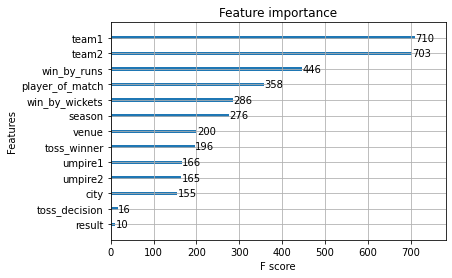

In [46]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)

#print features according to importances
print("Train Accuracy = %.2f" % (accuracy_score(y_train, clf.predict(X_train)) * 100))
print("Test Accuracy: %.2f" % (accuracy * 100.0))
xgb.plot_importance(clf)

# Build XGBClassifier Model and Tune using hit-and-trial

In [47]:
#drop "umpire1', "umpire2", "toss_decision", "result", "venue", "toss_winner", "city", "dl_applied", "season"
X_train = X_train.drop(columns = ['umpire1', 'umpire2', 'toss_decision', 'result', 'venue', 'toss_winner', 'city', 'dl_applied', 'season'])
X_test = X_test.drop(columns = ['umpire1', 'umpire2', 'toss_decision', 'result', 'venue', 'toss_winner', 'city', 'dl_applied', 'season'])

> Build and fit model on training data distribution

In [48]:
# fit model on training data
ev_set = [(X_train, y_train), (X_test, y_test)]
model = xgb.XGBClassifier(learning_rate = 0.36, max_depth = 10, min_child_weight = 1, n_estimators = 20, random_state = 0, n_jobs = -1, eval_metric = 'error')
model.fit(X_train, y_train, eval_set = ev_set, eval_metric = 'merror', verbose = True)

[0]	validation_0-merror:0.04537	validation_1-merror:0.10132
[1]	validation_0-merror:0.03025	validation_1-merror:0.08811
[2]	validation_0-merror:0.01890	validation_1-merror:0.07049
[3]	validation_0-merror:0.00945	validation_1-merror:0.06167
[4]	validation_0-merror:0.00945	validation_1-merror:0.06167
[5]	validation_0-merror:0.00756	validation_1-merror:0.04846
[6]	validation_0-merror:0.00378	validation_1-merror:0.04405
[7]	validation_0-merror:0.00378	validation_1-merror:0.04405
[8]	validation_0-merror:0.00189	validation_1-merror:0.03965
[9]	validation_0-merror:0.00189	validation_1-merror:0.03965
[10]	validation_0-merror:0.00189	validation_1-merror:0.03965
[11]	validation_0-merror:0.00189	validation_1-merror:0.03965
[12]	validation_0-merror:0.00189	validation_1-merror:0.04405
[13]	validation_0-merror:0.00000	validation_1-merror:0.04405
[14]	validation_0-merror:0.00000	validation_1-merror:0.04405
[15]	validation_0-merror:0.00000	validation_1-merror:0.04405
[16]	validation_0-merror:0.00000	v

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.36,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=20, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

> Make precitions of model on test set

In [49]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

> Evaluate accuracy score by comparing test and predicted values

Test Accuracy = 1.00
Test Accuracy = 95.59


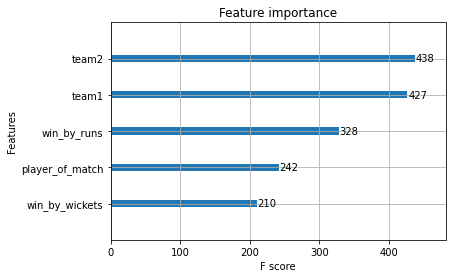

In [50]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy = %.2f" % (accuracy_score(y_train, model.predict(X_train))))
print("Test Accuracy = %.2f" % (accuracy * 100.0))
xgb.plot_importance(model)

# Tune Hyperparameters for XGBClassifier using GridSearchCV

> Search hyperparameter values

In [51]:
#make a dictionary of parameters and their values to tested
#92.43
param_grid = {'max_depth': [10, 15, 20, 25], 
              'n_estimators': [20, 30, 100], 
              'learning_rate': [0.36, 0.38, 0.4, 0.5, 1],
              'min_child_weight':[1],
              'n_jobs':[-1]
             }

#build xgbClassifier
clf = xgb.XGBClassifier()

#pass the model to gridsearch to search for parameters
grid_search = GridSearchCV(clf, param_grid, cv = 3, refit = True)

#fit the train data to gridsearch object 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

> Print the best parameters and best score corresponding to the best parameters

In [52]:
print ('Best parameters:', grid_search.best_params_)
print ('Best estimator:', grid_search.best_estimator_)
print ('Best score:', grid_search.best_score_)

Best parameters: {'learning_rate': 0.4, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 20, 'n_jobs': -1}
Best estimator: XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.4, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)
Best score: 0.9432781201849


> Build the model again using the hyperparameter values obtained in the search

In [53]:
#fit the model with the best parameter values obtained
ev_set = [(X_train, y_train), (X_test, y_test)]
#model.fit(X_train.drop(columns = ['umpire1', 'umpire2', 'toss_decision', 'result', 'venue', 'toss_winner', 'city','dl_applied', 'season']), y_train, eval_metric = "merror", eval_set = ev_set, verbose = True)
clf = xgb.XGBClassifier(learning_rate = 0.4, max_depth = 10, min_child_weight = 1, n_estimators = 20, n_jobs = -1)
clf.fit(X_train, y_train, eval_metric = 'merror', eval_set = ev_set, verbose = True)

[0]	validation_0-merror:0.04537	validation_1-merror:0.10132
[1]	validation_0-merror:0.02836	validation_1-merror:0.08811
[2]	validation_0-merror:0.01890	validation_1-merror:0.07049
[3]	validation_0-merror:0.01323	validation_1-merror:0.06167
[4]	validation_0-merror:0.00945	validation_1-merror:0.04846
[5]	validation_0-merror:0.00756	validation_1-merror:0.04405
[6]	validation_0-merror:0.00189	validation_1-merror:0.03965
[7]	validation_0-merror:0.00189	validation_1-merror:0.03965
[8]	validation_0-merror:0.00189	validation_1-merror:0.03965
[9]	validation_0-merror:0.00189	validation_1-merror:0.03965
[10]	validation_0-merror:0.00189	validation_1-merror:0.03965
[11]	validation_0-merror:0.00000	validation_1-merror:0.03965
[12]	validation_0-merror:0.00000	validation_1-merror:0.03965
[13]	validation_0-merror:0.00000	validation_1-merror:0.03965
[14]	validation_0-merror:0.00000	validation_1-merror:0.03965
[15]	validation_0-merror:0.00000	validation_1-merror:0.03965
[16]	validation_0-merror:0.00000	v

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.4, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [54]:
# make predictions for test data on tuned model
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]

Train Accuracy = 100.00
Test Accuracy = 96.04


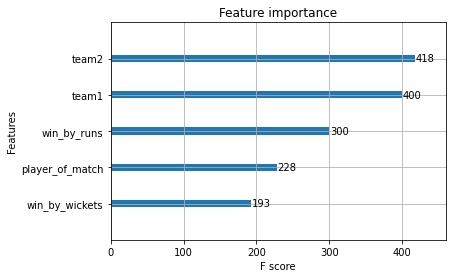

In [55]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Train Accuracy = %.2f" % (accuracy_score(y_train, clf.predict(X_train)) * 100))
print("Test Accuracy = %.2f" % (accuracy * 100.0))
xgb.plot_importance(clf)